# LETS GROW MORE
Name:SHRI HARSINIMIRA G

LEVEL:INTERMEDIATE LEVEL

LANGUAGE:PYTHON

TASK3:PREDICTION USING DECISION TREE ALGORITHM

dataset:https://bit.ly/3kXTdox
    


In [43]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
a=pd.read_csv("Iris (1).csv",index_col=0)
a.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [46]:
a.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


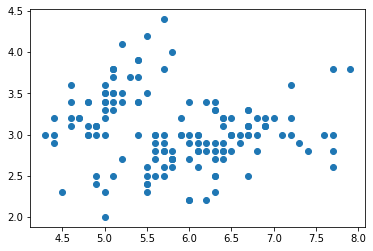

In [47]:
plt.scatter(a['SepalLengthCm'],a['SepalWidthCm'])

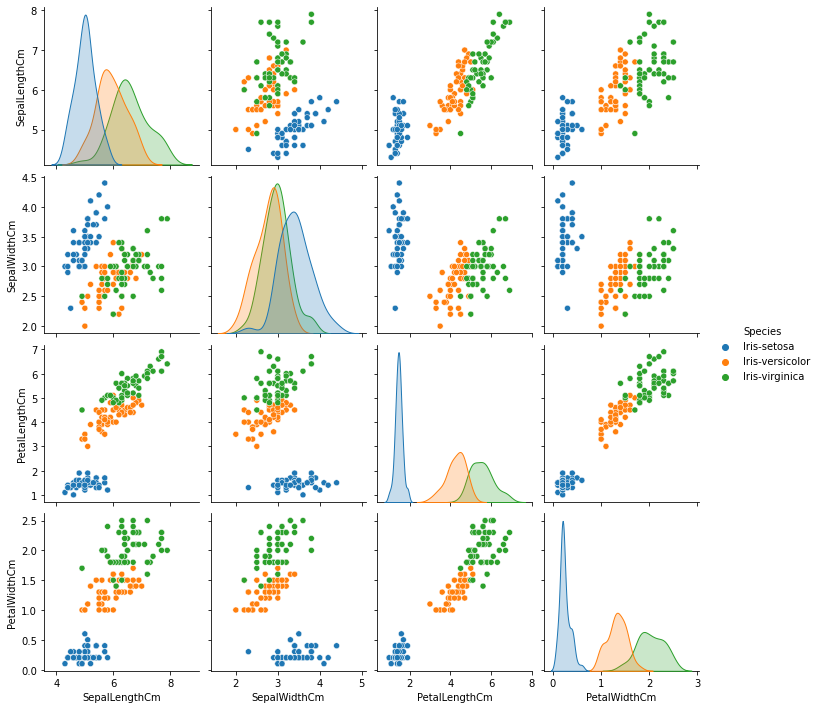

In [48]:
sns.pairplot(a,hue='Species')

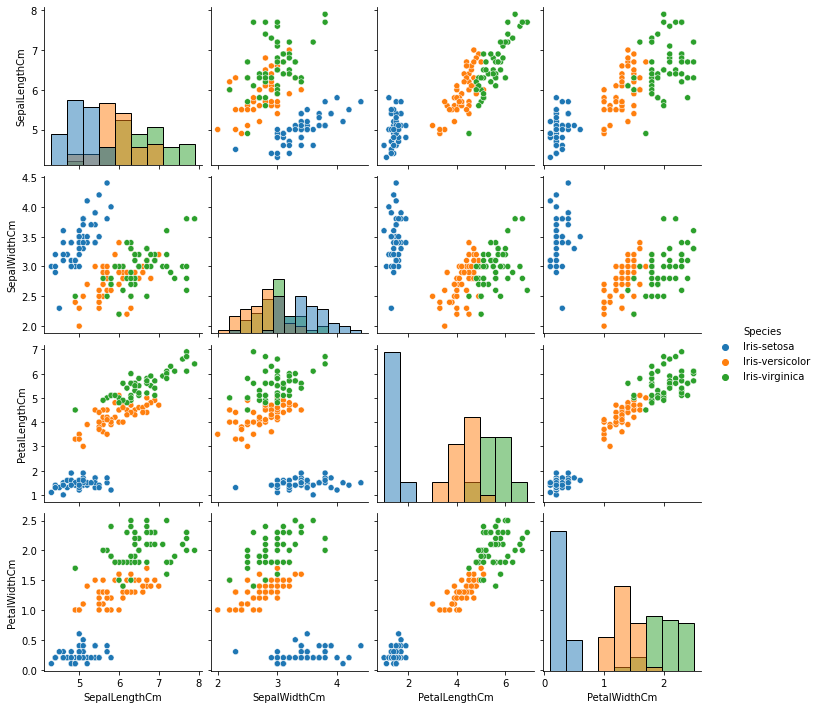

In [49]:
sns.pairplot(a,hue='Species',diag_kind="hist")

In [50]:
a.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

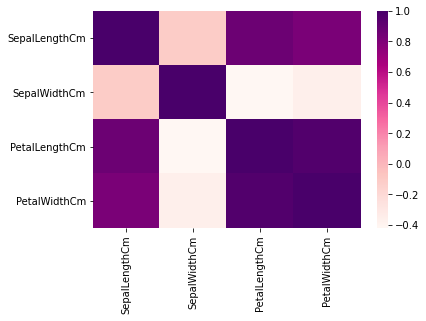

In [51]:
sns.heatmap(a.corr(),cmap="RdPu")

In [52]:
target=a['Species']
df=a.copy()
df=df.drop('Species',axis=1)
df.shape

(150, 4)

In [53]:
x=a.iloc[:,[0,1,2,3]].values
LaEn=LabelEncoder()
a['Species']=LaEn.fit_transform(a['Species'])
y=a['Species'].values
a.shape

(150, 5)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Trainging set:",x_train.shape)
print("Testing set:",x_test.shape)

Trainging set: (120, 4)
Testing set: (30, 4)


In [58]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
print("Decison Tree Classifier created!")


Decison Tree Classifier created!


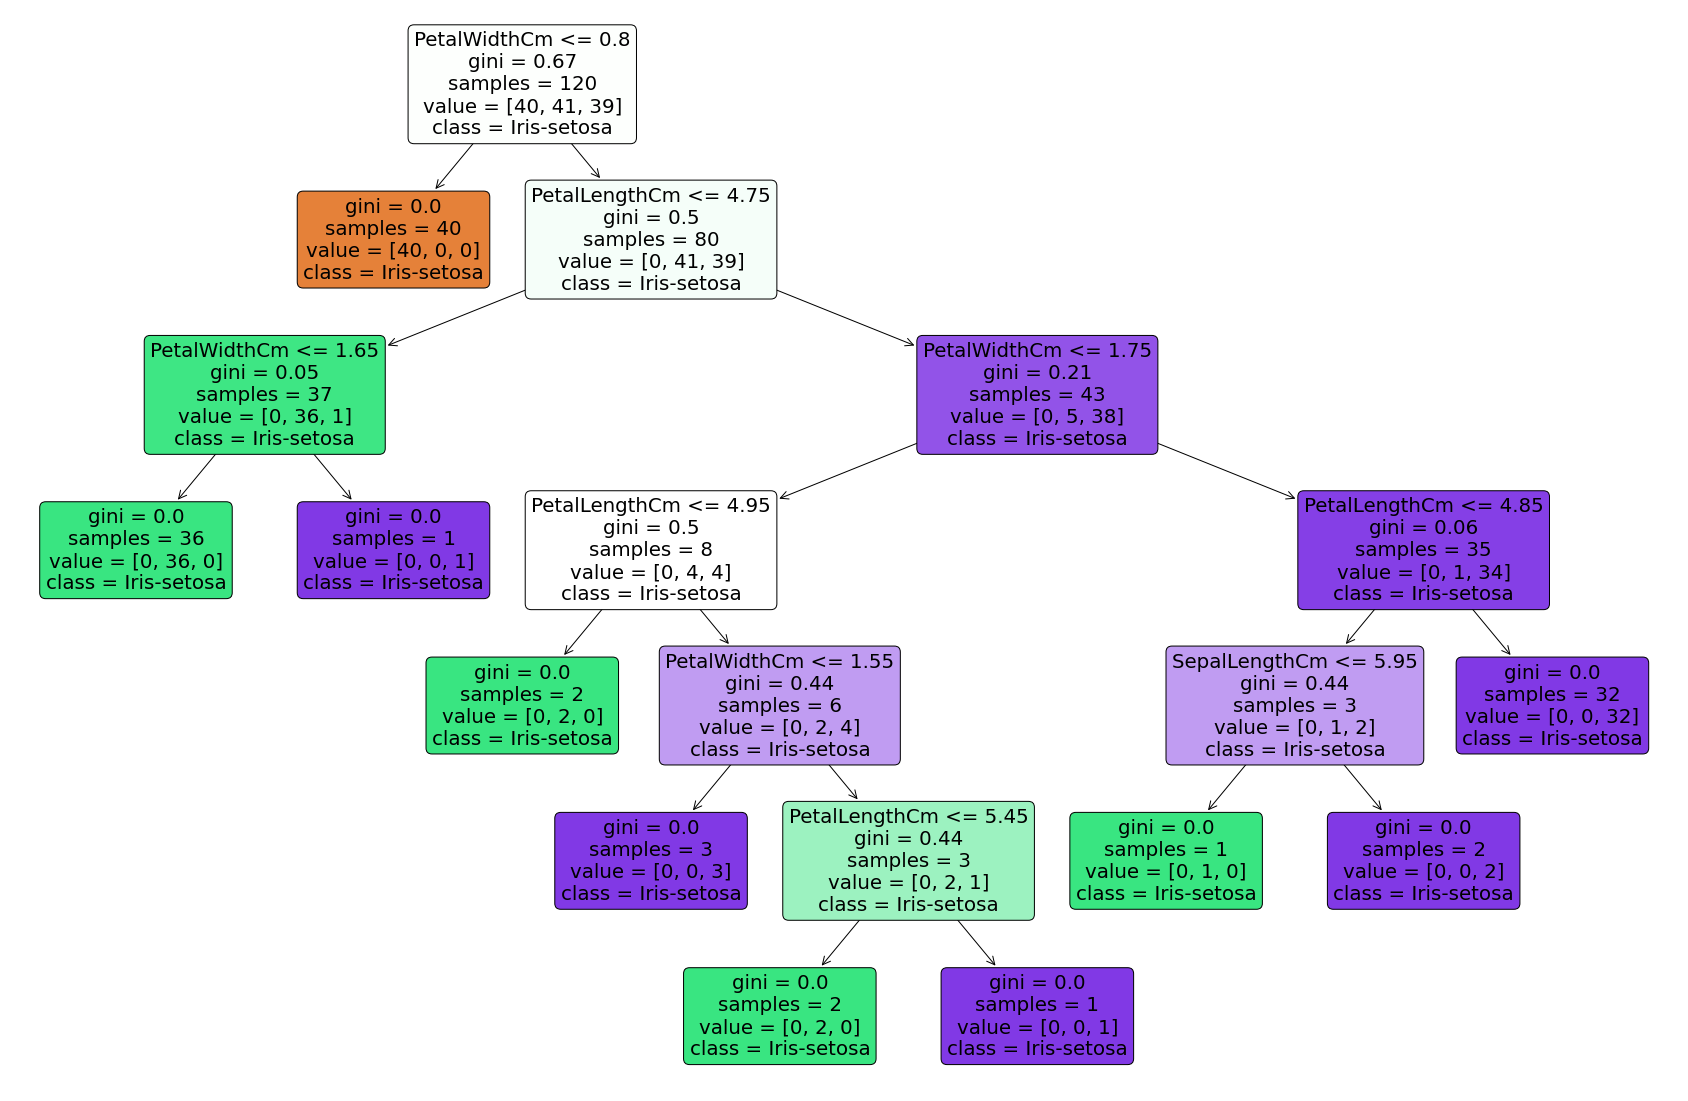

In [60]:
plt.figure(figsize=(30,20))
tree=plot_tree(d_tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

In [61]:
y_pred=d_tree.predict(x_test)
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [62]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))


Accuracy: 1.0


In [63]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)